#  Latihan Pertama untuk mengelompokkan warna berdasarkan 'Musim'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
#muat dataset colors
colors_df = pd.read_csv('colorhexa_com.csv')
colors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           746 non-null    object 
 1   Hex (24 bit)   746 non-null    object 
 2   Red (8 bit)    746 non-null    int64  
 3   Green (8 bit)  746 non-null    int64  
 4   Blue (8 bit)   746 non-null    int64  
 5   Hue (degrees)  746 non-null    float64
 6   HSL.S (%)      746 non-null    float64
 7   HSL.L (%)      746 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 46.8+ KB


In [4]:
#Dictionary Seasonal
#Spring = Semi
#Summer = Panas
#Autumn = Gugur
#Winter = Dingin
colors_df.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),HSL.L (%)
0,Air Force blue,#5d8aa8,93,138,168,204.0,30.1,51.2
1,Alice blue,#f0f8ff,240,248,255,208.0,100.0,97.1
2,Alizarin crimson,#e32636,227,38,54,354.9,77.1,52.0
3,Almond,#efdecd,239,222,205,30.0,51.5,87.1
4,Amaranth,#e52b50,229,43,80,348.1,78.2,53.3


### Pola/pattern percobaan pengelompok-an warna

In [5]:
#fungsi untuk kategori warna
def categorize_color(row):
    red = row['Red (8 bit)']
    green = row['Green (8 bit)']
    blue = row['Blue (8 bit)']
    hue = row['Hue (degrees)']
    saturation = row['HSL.S (%)']
    lightness = row['HSL.L (%)']
    
    # Spring: Bright and warm colors
    if ((0 <= hue <= 45 or 60 <= hue <= 120) and saturation > 50 and lightness > 50) or (red > 200 and green > 150 and blue < 150):
        return 'Spring'
    # Summer: Cool colors with high lightness
    elif (120 < hue <= 240 and saturation <= 50 and lightness > 50) or (red < 100 and green > 100 and blue > 100):
        return 'Summer'
    # Autumn: Warm colors with low lightness
    elif ((0 <= hue <= 45 or 45 < hue <= 120) and saturation <= 50 and lightness <= 50) or (red > 150 and green < 100 and blue < 100):
        return 'Autumn'
    # Winter: Cool colors with low lightness
    elif (240 < hue <= 360 and saturation > 50 and lightness <= 50) or (red < 100 and green < 100 and blue > 150):
        return 'Winter'
    else:
        return 'Uncategorized'

In [18]:
# Apply the function to categorize colors
colors_df['Season'] = colors_df.apply(categorize_color, axis=1)
colors_df.head(10)

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),HSL.L (%),Season
0,Air Force blue,#5d8aa8,93,138,168,204.0,30.1,51.2,Summer
1,Alice blue,#f0f8ff,240,248,255,208.0,100.0,97.1,Uncategorized
2,Alizarin crimson,#e32636,227,38,54,354.9,77.1,52.0,Autumn
3,Almond,#efdecd,239,222,205,30.0,51.5,87.1,Spring
4,Amaranth,#e52b50,229,43,80,348.1,78.2,53.3,Autumn
5,Amber,#ffbf00,255,191,0,44.9,100.0,50.0,Spring
6,American rose,#ff033e,255,3,62,346.0,100.0,50.6,Autumn
7,Amethyst,#9966cc,153,102,204,270.0,50.0,60.0,Uncategorized
8,Android Green,#a4c639,164,198,57,74.5,55.3,50.0,Uncategorized
9,Anti-flash white,#f2f3f4,242,243,244,210.0,8.3,95.3,Summer


In [20]:
# Menghitung jumlah data untuk setiap kategori musim
season_counts = colors_df['Season'].value_counts()
season_counts

Season
Uncategorized    328
Spring           156
Autumn           110
Summer            91
Winter            61
Name: count, dtype: int64

In [7]:
new_colors_df = colors_df[colors_df['Season'] != 'Uncategorized']
# Check the distribution of categories
new_colors_df.head(10)

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),HSL.L (%),Season
0,Air Force blue,#5d8aa8,93,138,168,204.0,30.1,51.2,Summer
2,Alizarin crimson,#e32636,227,38,54,354.9,77.1,52.0,Autumn
3,Almond,#efdecd,239,222,205,30.0,51.5,87.1,Spring
4,Amaranth,#e52b50,229,43,80,348.1,78.2,53.3,Autumn
5,Amber,#ffbf00,255,191,0,44.9,100.0,50.0,Spring
6,American rose,#ff033e,255,3,62,346.0,100.0,50.6,Autumn
9,Anti-flash white,#f2f3f4,242,243,244,210.0,8.3,95.3,Summer
12,Antique white,#faebd7,250,235,215,34.3,77.8,91.2,Spring
15,Apricot,#fbceb1,251,206,177,23.5,90.2,83.9,Spring
16,Aqua,#00ffff,0,255,255,180.0,100.0,50.0,Summer


In [8]:
le = LabelEncoder()
new_colors_df['Season_encoded'] = le.fit_transform(new_colors_df['Season'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17452\1860629468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_colors_df['Season_encoded'] = le.fit_transform(new_colors_df['Season'])


In [9]:
new_colors_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 744
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            418 non-null    object 
 1   Hex (24 bit)    418 non-null    object 
 2   Red (8 bit)     418 non-null    int64  
 3   Green (8 bit)   418 non-null    int64  
 4   Blue (8 bit)    418 non-null    int64  
 5   Hue (degrees)   418 non-null    float64
 6   HSL.S (%)       418 non-null    float64
 7   HSL.L (%)       418 non-null    float64
 8   Season          418 non-null    object 
 9   Season_encoded  418 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 34.3+ KB


In [10]:
# Data preparation
X = new_colors_df[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)', 'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%)']]
y = new_colors_df['Season']

In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Make predictions
y_pred = clf.predict(X_test)

In [14]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Autumn       0.97      0.91      0.94        32
      Spring       0.96      0.98      0.97        51
      Summer       1.00      1.00      1.00        29
      Winter       0.93      1.00      0.97        14

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



C:\Users\lenovo\AppData\Local\Temp\ipykernel_17452\21010880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_colors_df, x='Season',


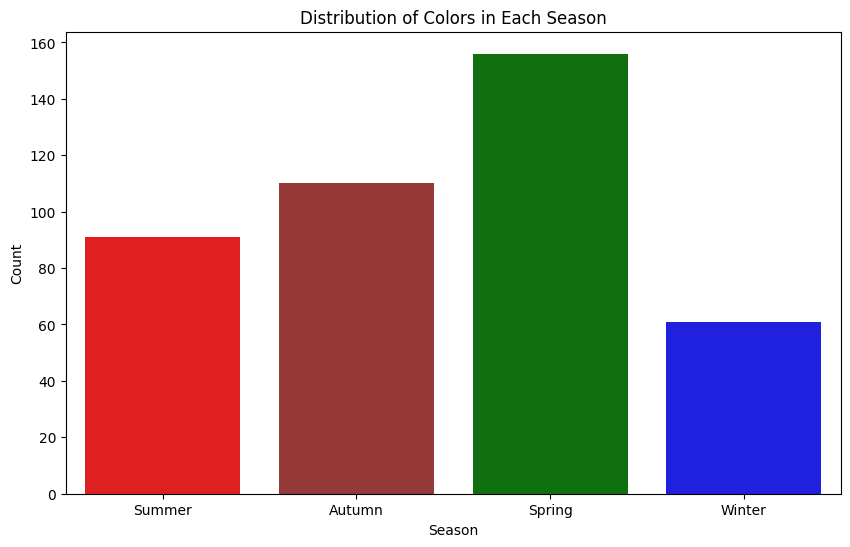

In [15]:
# Visualization Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=new_colors_df, x='Season', 
              palette={'Spring': 'green', 'Summer': 'red', 'Autumn': 'brown', 'Winter': 'blue'})
plt.title('Distribution of Colors in Each Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

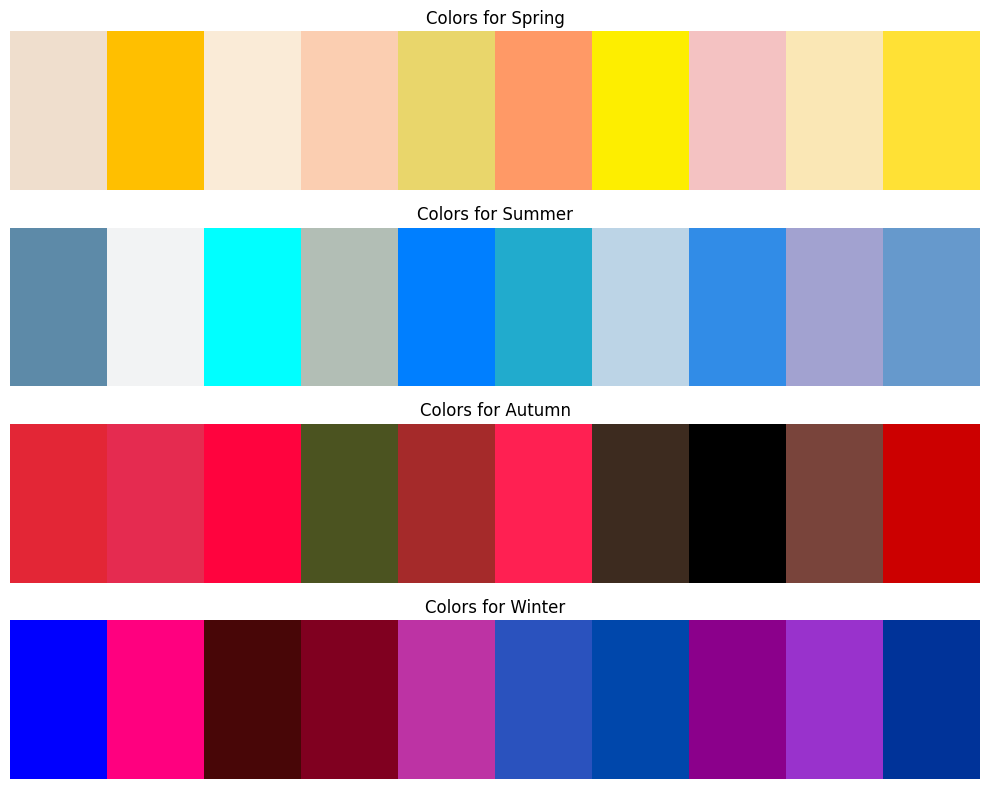

In [21]:
# Function to convert RGB values from 0-255 to 0-1 range
def rgb_to_mpl_color(rgb):
    return (rgb[0] / 255, rgb[1] / 255, rgb[2] / 255)

# Sample colors for each season
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
colors_per_season = {season: [] for season in seasons}

# Populate colors_per_season with the actual RGB values
for season in seasons:
    season_colors = colors_df[colors_df['Season'] == season].head(10)[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)']].values
    colors_per_season[season] = [rgb_to_mpl_color(color) for color in season_colors]

# Plot the colors
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

for ax, season in zip(axes, seasons):
    ax.imshow([colors_per_season[season]], aspect='auto')
    ax.set_title(f'Colors for {season}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Hasil dari percobaan ini, berdasarkan dataset warna yang digunakan
### antara data warna pola belum ditemukan kesesuaian warna dengan musim seperti yang diinginkan